# 성수동에서 핫한 카페는?
by Sean Park, 20-04-16
> 내가 거주하고있는 성수동에는 카페가 참 많다.  
> 재생 인테리어의 매력이 깃든 어니언부터, 오픈 당일 인스타그래머들을 몇 시간 씩 줄세운 블루보틀 1호점까지.  
> 힙스터와 커피성애자들이 모이는 성수동에서, **가장 핫한 카페는 어디일까?**

* 목적: 성수동에서 별점이 높은 카페들 찾아보기

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-수집하기" data-toc-modified-id="1.-데이터-수집하기-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>1. 데이터 수집하기</a></span></li><li><span><a href="#2.-데이터-전처리" data-toc-modified-id="2.-데이터-전처리-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>2. 데이터 전처리</a></span><ul class="toc-item"><li><span><a href="#2-1.-Null-처리" data-toc-modified-id="2-1.-Null-처리-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>2-1. Null 처리</a></span></li><li><span><a href="#2-2.-텍스트-처리" data-toc-modified-id="2-2.-텍스트-처리-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>2-2. 텍스트 처리</a></span></li></ul></li><li><span><a href="#3.-데이터-분석" data-toc-modified-id="3.-데이터-분석-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>3. 데이터 분석</a></span><ul class="toc-item"><li><span><a href="#3-1.-별점이-높은-카페-찾기" data-toc-modified-id="3-1.-별점이-높은-카페-찾기-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>3-1. 별점이 높은 카페 찾기</a></span><ul class="toc-item"><li><span><a href="#3-1-1.-기준-1)-평가-수(score_cnt)" data-toc-modified-id="3-1-1.-기준-1)-평가-수(score_cnt)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>3-1-1. 기준 1) 평가 수(score_cnt)</a></span></li><li><span><a href="#3-1-2.-기준-2)-리뷰-수(review_cnt)" data-toc-modified-id="3-1-2.-기준-2)-리뷰-수(review_cnt)-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>3-1-2. 기준 2) 리뷰 수(review_cnt)</a></span></li></ul></li><li><span><a href="#3-2.-가장-유명한-카페-찾기" data-toc-modified-id="3-2.-가장-유명한-카페-찾기-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3-2. 가장 유명한 카페 찾기</a></span><ul class="toc-item"><li><span><a href="#3-2-1.-인지도-지표-추가" data-toc-modified-id="3-2-1.-인지도-지표-추가-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>3-2-1. 인지도 지표 추가</a></span></li><li><span><a href="#3-2-2.-유명한-카페의-별점은?" data-toc-modified-id="3-2-2.-유명한-카페의-별점은?-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>3-2-2. 유명한 카페의 별점은?</a></span></li></ul></li><li><span><a href="#3-3.-은근히-넓은-성수동,-어디로-가야할까?" data-toc-modified-id="3-3.-은근히-넓은-성수동,-어디로-가야할까?-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3-3. 은근히 넓은 성수동, 어디로 가야할까?</a></span><ul class="toc-item"><li><span><a href="#3-3-1.-카페의-지리-정보-찾기" data-toc-modified-id="3-3-1.-카페의-지리-정보-찾기-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>3-3-1. 카페의 지리 정보 찾기</a></span></li><li><span><a href="#3-3-2.-어디가-카페가-많을까?" data-toc-modified-id="3-3-2.-어디가-카페가-많을까?-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>3-3-2. 어디가 카페가 많을까?</a></span></li><li><span><a href="#3-3-3.-어디를-가야-평점이-높은-카페가-많을까?" data-toc-modified-id="3-3-3.-어디를-가야-평점이-높은-카페가-많을까?-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>3-3-3. 어디를 가야 평점이 높은 카페가 많을까?</a></span></li></ul></li></ul></li><li><span><a href="#4.-결론" data-toc-modified-id="4.-결론-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>4. 결론</a></span></li></ul></div>

---
## 1. 데이터 수집하기
* 데이터는 카카오맵을 기준으로 수집한다.
    * 구글 맵을 안 쓴 이유는 카페의 절대적인 수가 많기 때문이다.
    * 네이버맵은 평점이 조회하기 불편하게 제공된다.

In [157]:
import folium
import warnings
from selenium import webdriver
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import time

In [158]:
# 스타일 변경으로 인해 폰트 다시 설정
plt.rc('font', family='NanumGothic')
plt.rc('font', size=13)

In [3]:
driver = webdriver.Chrome('chromedriver/chromedriver.exe')

In [4]:
driver.get('https://map.kakao.com/')

In [5]:
driver.find_element_by_id('search.keyword.query').send_keys('카페')    # 카페 검색
driver.implicitly_wait(10)
time.sleep(1)
driver.find_element_by_id('search.keyword.submit').click()    # 검색 클릭
driver.implicitly_wait(10)
time.sleep(1)
driver.find_element_by_xpath('//*[@id="info.search.place.more"]').click()    # 더 보기 클릭

In [6]:
from tqdm import tqdm_notebook
dict_cafe = {'name': [], 'address': [], 'score': [], 'score_cnt': [], 'review_cnt': []}
for pagenum in tqdm_notebook(range(1, 36)):
    try:
        page = pagenum % 5    # 페이지 이동 버튼의 id넘버가 5의 나머지로 되어있다. (1페이지 = p1, 6페이지 = p1, 7페이지 = p2 ...)
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')
        for cafenum in range(15):
            dict_cafe['name'].append(soup.find_all('a', 'link_name')[cafenum].text)
            dict_cafe['address'].append(soup.find_all('p', 'lot_number')[cafenum].text)
            dict_cafe['score'].append(soup.find_all('em', 'num')[cafenum].text)
            dict_cafe['score_cnt'].append(soup.find_all('a', 'numberofscore')[cafenum].text)
            dict_cafe['review_cnt'].append(soup.find_all('a', 'review', 'em')[cafenum].text)
        
        # 페이지가 5페이지씩 나뉘어져있는데(1-5, 6-10..), 마지막 페이지(5의 배수 페이지)에 도착했을 경우, 다음 버튼 클릭
        if page == 0:
            driver.find_element_by_id('info.search.page.next').click()
        else:
            driver.find_element_by_id('info.search.page.no{}'.format(page+1)).click()
        time.sleep(1)
    except:
        print('페이지 초과: {}'.format(pagenum))

In [7]:
df_raw = pd.DataFrame(dict_cafe)

In [8]:
df_raw.to_csv('source/cafe_in_seongsu.csv')

* 기다림 끝에 크롤링이 완료된 후에는 저장을 해놓는 것이 안전하다.

In [162]:
df_raw = pd.read_csv('source/cafe_in_seongsu.csv', index_col=0)

## 2. 데이터 전처리
* 결측값을 처리하고, 텍스트와 숫자를 보기 좋게 수정하자.

### 2-1. Null 처리

In [163]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 0 to 504
Data columns (total 5 columns):
name          505 non-null object
address       504 non-null object
score         505 non-null float64
score_cnt     505 non-null object
review_cnt    505 non-null object
dtypes: float64(1), object(4)
memory usage: 23.7+ KB


* address컬럼에서 1개의 null값이 발견됐다.

In [164]:
df_raw[df_raw.address.isnull()]

,name,address,score,score_cnt,review_cnt
484,코지카페,NaN,0.0,0건,리뷰 0


* 조회해보니, 평점과 리뷰가 없다.
* 삭제해도 무방할 듯 하다.

In [165]:
df_raw.drop(df_raw[df_raw.address.isnull()].index, axis=0, inplace=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 504
Data columns (total 5 columns):
name          504 non-null object
address       504 non-null object
score         504 non-null float64
score_cnt     504 non-null object
review_cnt    504 non-null object
dtypes: float64(1), object(4)
memory usage: 23.6+ KB


* Null값을 삭제해주자.

### 2-2. 텍스트 처리

In [166]:
df_raw.head()

,name,address,score,score_cnt,review_cnt
0,블루보틀 성수점,(지번) 성수동1가 656-302,2.8,85건,리뷰 635
1,할아버지공장,(지번) 성수동2가 309-133,3.0,27건,리뷰 257
2,차,(지번) 성수동1가 685-408,2.6,28건,리뷰 120
3,어니언,(지번) 성수동2가 277-135,3.4,140건,"리뷰 1,257"
4,대림창고,(지번) 성수동2가 322-32,3.3,143건,리뷰 601


* address 컬럼은 데이터 앞의 (지번) 을 지워주자.
* score_cnt, review_cnt 컬럼은 숫자+텍스트 형식으로 되어있다.
    * 숫자만 남겨놓고, 텍스트는 정규식을 사용해서 없애자.

In [167]:
for row in df_raw.index:
    df_raw.address[row] = df_raw.address[row][5:]
df_raw.head()

,name,address,score,score_cnt,review_cnt
0,블루보틀 성수점,성수동1가 656-302,2.8,85건,리뷰 635
1,할아버지공장,성수동2가 309-133,3.0,27건,리뷰 257
2,차,성수동1가 685-408,2.6,28건,리뷰 120
3,어니언,성수동2가 277-135,3.4,140건,"리뷰 1,257"
4,대림창고,성수동2가 322-32,3.3,143건,리뷰 601


* 주소만 깔끔하게 남았다.

In [168]:
# score_cnt, review_cnt에서 숫자만 유지
import re
p = re.compile('\D')
for row in df_raw.index:
    df_raw.loc[row, 'score_cnt'] = p.sub('', df_raw.loc[row, 'score_cnt'])
    df_raw.loc[row, 'review_cnt'] = p.sub('', df_raw.loc[row, 'review_cnt'])
df_raw.head()

,name,address,score,score_cnt,review_cnt
0,블루보틀 성수점,성수동1가 656-302,2.8,85,635
1,할아버지공장,성수동2가 309-133,3.0,27,257
2,차,성수동1가 685-408,2.6,28,120
3,어니언,성수동2가 277-135,3.4,140,1257
4,대림창고,성수동2가 322-32,3.3,143,601


In [169]:
df_raw['score_cnt'] = df_raw['score_cnt'].astype(int)
df_raw['review_cnt'] = df_raw['review_cnt'].astype(int)
df_raw['score'] = df_raw['score'].astype(float)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 504
Data columns (total 5 columns):
name          504 non-null object
address       504 non-null object
score         504 non-null float64
score_cnt     504 non-null int32
review_cnt    504 non-null int32
dtypes: float64(1), int32(2), object(2)
memory usage: 39.7+ KB


* score_cnt, review_cnt컬럼에서 숫자만 유지한 후, 컬럼의 데이터 형식을 숫자로 바꿔줬다.

## 3. 데이터 분석
* 준비는 끝났다. 이제 친구에게 자신있게 추천해줄 만한 카페를 찾아보자.

### 3-1. 별점이 높은 카페 찾기

In [170]:
df_raw.sort_values('score', ascending=False)

,name,address,score,score_cnt,review_cnt
504,큐토스침니,화양동 33-30,5.0,3,0
78,더메이즈 건대점,자양동 10-1,5.0,4,81
187,커피코코,성수동2가 278-35,5.0,1,1
93,위커파크 성수점,성수동2가 301-3,5.0,1,21
92,업사이드 뚝섬점,성수동1가 7-8,5.0,2,28
...,...,...,...,...,...
370,얌커피로스터스,성수동2가 279-50,0.0,0,0
135,카페도르,성수동2가 275-75,0.0,0,2
372,CM카페,성수동1가 13-17,0.0,0,0
373,에잇어클락,성수동2가 299-241,0.0,0,2


* 단순히 별점 순으로 조회하니, 평가가 적게 된 카페들이 상위에 랭크되어있다.
    * 이러면 신뢰성이 낮아지니, 랭킹 기준을 정해서 다시 조회해보자.
* 평가 수가(score_cnt)가 평균 이상인 데이터들을 기준으로 정렬해보면 어떨까?

#### 3-1-1. 기준 1) 평가 수(score_cnt)

In [175]:
df_raw.score_cnt.describe()

count    504.000000
mean       4.529762
std       12.070663
min        0.000000
25%        0.000000
50%        1.000000
75%        4.000000
max      143.000000
Name: score_cnt, dtype: float64

In [183]:
df_raw.score_cnt.mean()

4.529761904761905

* 카페의 평균 평가 수가 4개로, 생각보다 낮다.
    * 좋은 카페를 찾고싶은데, 평가가 4개면 그 별점이 신뢰가 안 갈 것 같다.
* 그러면 평가를 한 번도 안 받은 카페를 제외하고 평균을 구해보자.

In [191]:
df_raw[df_raw.score_cnt != 0].score_cnt.describe()

count    306.000000
mean       7.460784
std       14.776591
min        1.000000
25%        1.000000
50%        3.000000
75%        7.000000
max      143.000000
Name: score_cnt, dtype: float64

* 평가 수가 0개인 카페를 제외하니, 평균이 7로 올랐다.
    * 물론 표준편차가 크고 아웃라이어가 많아서 사분위값으로 정하는 것이 더 정확한 방법일 수도 있다.
    * 하지만 지금은 통계적인 분석이 아니라 (납득할 수 있는) 기준을 정하는 것이기 때문에... **평균인 7을 사용**하도록 하겠다.

In [216]:
df_filter1 = df_raw[df_raw.score_cnt >= 7]
print('평가를 7건 이상 받은 카페: 총 {}개 중 {}개 ({:.2f}%)'.format(len(df_raw), len(df_filter1), (len(df_filter1) / len(df_raw)*100)))

평가를 7건 이상 받은 카페: 총 504개 중 84개 (16.67%)


In [217]:
df_filter1.sort_values('score', ascending=False).head()

,name,address,score,score_cnt,review_cnt
318,스텀필즈커피 성수점,성수동2가 289-319,4.8,16,0
102,브루잉세레모니,성수동2가 315-27,4.8,10,30
84,커피오스,성수동2가 333-72,4.7,25,130
38,하루앤원데이,성수동2가 314-5,4.6,7,38
55,카페라잌유,성수동1가 656-1017,4.5,8,100


* 나는 처음들어보는 스텀필즈커피가 1위이다. 찾아보니, 오피스 1층에 있는 카페이다.
* 브루잉세레모니는 이번에 처음 알았는데, 찾아보니 감성이 장난이 아니다..
* 전 직장 다닐 때 자주 다녔던 카페라잌유도 평점이 높다.
    * 참고로 카페라잌유 시그니처 음료(라떼였던것같은데!) 참 맛있었던 기억이 있다!
---
* 근데 자세히 보니, 스텀필즈커피는 평가는 16건인데, 리뷰(블로그 후기 등)은 0건이다.
    * 이러면 친구한테 자신있게 추천을 못할 것 같다.
    * 우리 모두 카페나 맛집을 갈 때 블로그 글은 한 번씩 찾아보지 않는가?
* 좀 더 자신감을 얻기 위해, **리뷰 수로 추가 필터링을 해보자.**

#### 3-1-2. 기준 2) 리뷰 수(review_cnt)
* 일단 평균 리뷰 수를 조회해보자.

In [219]:
df_filter1.review_cnt.describe()

count      84.000000
mean      142.357143
std       181.435550
min         0.000000
25%        38.750000
50%        94.500000
75%       160.250000
max      1257.000000
Name: review_cnt, dtype: float64

**어떤 것을 기준으로 해야할까?**
* 일단, 평균은 리뷰 142개, 중앙값은 94개다.
* 142개든, 94개든 충분히 리뷰가 많다고 볼 수 있을 것 같다.
* 그러면 여기서 중앙값, 평균 기준으로 필터를 했을 때 각각 몇개의 데이터가 남는지 살펴보자.

In [254]:
print('중앙값 기준: {}개 중 {}개 (당연하게도, {:.2f}%)\n평균 기준: {}개 중 {}개 ({:.2f}%)'.format(
    len(df_filter1),
    len(df_filter1[df_filter1.review_cnt > 94]),
    len(df_filter1[df_filter1.review_cnt > 94]) / len(df_filter1)*100,
    len(df_filter1),
    len(df_filter1[df_filter1.review_cnt > 142]),
    len(df_filter1[df_filter1.review_cnt > 142]) / len(df_filter1)*100))

중앙값 기준: 84개 중 42개 (당연하게도, 50.00%)
평균 기준: 84개 중 25개 (29.76%)


* 평균을 사용하면 보다 많은 리뷰가 많은 카페를 고를 수 있겠지만, 너무 많은 카페들이 떨어져나간다.
    * 또한, 1차 필터링을 했기 때문에 보다 덜 엄격한 기준인 **중앙값을 사용해서 필터링해보자.**

In [277]:
df_filter2 = df_filter1[df_filter1.review_cnt >= 94]
df_filter2.sort_values('score', ascending=False).reset_index(drop=True).head(10)

,name,address,score,score_cnt,review_cnt
0,커피오스,성수동2가 333-72,4.7,25,130
1,카페라잌유,성수동1가 656-1017,4.5,8,100
2,치카치카,성수동2가 512,4.5,12,117
3,리도엘리펀트,성수동2가 333-97,4.4,18,137
4,로우커피스탠드,성수동1가 8-16,4.0,26,107
5,카페오롯,성수동1가 13-428,3.9,10,151
6,우디집,성수동1가 311,3.9,7,192
7,멜로워 성수플래그쉽,성수동2가 333-94,3.8,27,392
8,커피식탁,성수동1가 656-1096,3.8,13,117
9,훔볼트,성수동2가 325-17,3.7,27,324


* (짝짝짝) **커피오스**가 2차 필터링 결과 가장 평이 높은 카페였다.
    * 몰랐던 카페였는데 코로나가 잠잠해지면 가봐야겠다 ㅋㅋ
* **치카치카**는 찾아보니 사실 성수동 메인 거리(서울숲, 카페거리 등)에 있는 곳은 아니었다. 
    * 하지만 마카롱의 엄청난 비주얼이 날 반겨줬다.
* **리도 엘리펀트**는 내부 인테리어도 예쁘지만, 바람이 불 때 루프탑에 앉아있으면 세상을 가진 기분이다.
* **로우스탠드**는 친한 전 직장 동료분이 가장 좋아하는 커피집.
    * 성수동은 지역 특성상 공간이 좁은 카페가 많은데, 이 곳은 맛과 공간, 감성을 모두 담은 카페
* **커피식탁**은 전 직장 동료분께서 운영하고 계신데, 모든 음료가 맛있다!!
    * 아기자기한 분위기는 뽀나스

### 3-2. 가장 유명한 카페 찾기
* 이제 친구한테 어떤 카페를 추천해야하는지는 알아냈다.
* 그러면 **성수동에서 제일 유명한 카페는 어디일까?**
    * 후기가 많으면 그만큼 유명하다는 것을 반증하는 것 아닐까?
* 후기가 가장 많은 카페를 알아보고, 그 카페의 별점을 알아보자.

In [282]:
df_raw.sort_values(['score_cnt', 'review_cnt'], ascending=False).reset_index(drop=True).head(10)

,name,address,score,score_cnt,review_cnt
0,대림창고,성수동2가 322-32,3.3,143,601
1,어니언,성수동2가 277-135,3.4,140,1257
2,블루보틀 성수점,성수동1가 656-302,2.8,85,635
3,자그마치,성수동2가 317-12,3.2,71,319
4,오르에르,성수동1가 16-39,3.4,63,325
5,메쉬커피,성수동1가 685-307,4.1,40,58
6,카페성수,성수동1가 668-30,3.3,39,187
7,어반소스,성수동2가 301-16,3.6,36,605
8,카멜 성수점,성수동2가 570-1,3.6,35,383
9,바이산,성수동2가 322-32,3.1,33,329


* 성수동 카페 3대장인 대림창고, 어니언, 블루보틀이 자리매김했다.
* 개인적으로 성수동에서 가장 맛있는 커피집이라고 생각하는 메쉬커피도 6위로 높다. (괜히 뿌듯)
---
* 이 리스트를 보고있자니, **유명한 카페들의 평점을 더 직관적으로 보고싶어졌다.**
* 이를 위해, 인지도라는 지표를 추가해보자.

#### 3-2-1. 인지도 지표 추가
**인지도 점수(Awareness) = 평가 수 + (리뷰 수/10)**
* 위와 같이 지표를 정의하고자 한다.
    * 평가 수가 많을 때 유명하다고 생각하고, 리뷰는 가산점이라고 기준을 세웠다.
        * 이 기준은 당연히 매우 주관적이다!!
        * 더 적합한 기준이 있다면 알려주세요!!

In [293]:
df_raw['awareness'] = df_raw['score_cnt'] + df_raw['review_cnt']/10
df_raw.sort_values('awareness', ascending=False).reset_index(drop=True).head(10)

,name,address,score,score_cnt,review_cnt,awareness
0,어니언,성수동2가 277-135,3.4,140,1257,265.7
1,대림창고,성수동2가 322-32,3.3,143,601,203.1
2,블루보틀 성수점,성수동1가 656-302,2.8,85,635,148.5
3,자그마치,성수동2가 317-12,3.2,71,319,102.9
4,어반소스,성수동2가 301-16,3.6,36,605,96.5
5,오르에르,성수동1가 16-39,3.4,63,325,95.5
6,카멜 성수점,성수동2가 570-1,3.6,35,383,73.3
7,멜로워 성수플래그쉽,성수동2가 333-94,3.8,27,392,66.2
8,바이산,성수동2가 322-32,3.1,33,329,65.9
9,훔볼트,성수동2가 325-17,3.7,27,324,59.4


* 순위 변동이 조금 있었지만 **어니언, 대림창고, 블루보틀 3대장**이 여전히 상위권을 지키고 있다.
* 인지도 지표를 통해 가장 수혜를 본 카페는 **어반소스** 일 것 같다.
    * 8위에서 5위까지 올라왔다.
    * 어반소스는 아기자기한 느낌보다는 넓고, 조명, 간판 등이 트렌디하다.
    * 언급했듯, 성수동은 작은 카페가 많은데, 어반소스는 여러 사람들과 모임을 가지기에도 적당하다.
* **메쉬커피가 순위권에서 사라졌다!**
    * 찾아보니, 16위까지 밀려났다.
    * 아는 사람들만 아는, 아직 많이 알려지지 않은 카페라서 그런가? 라는 생각이 들었다.
        * 여담으로, 산미있는 커피를 좋아한다면, 메쉬커피는 꼭 마셔봐야한다고 생각한다.
* 그러면 이제 인지도와 평점을 시각화해보자.

#### 3-2-2. 유명한 카페의 별점은?

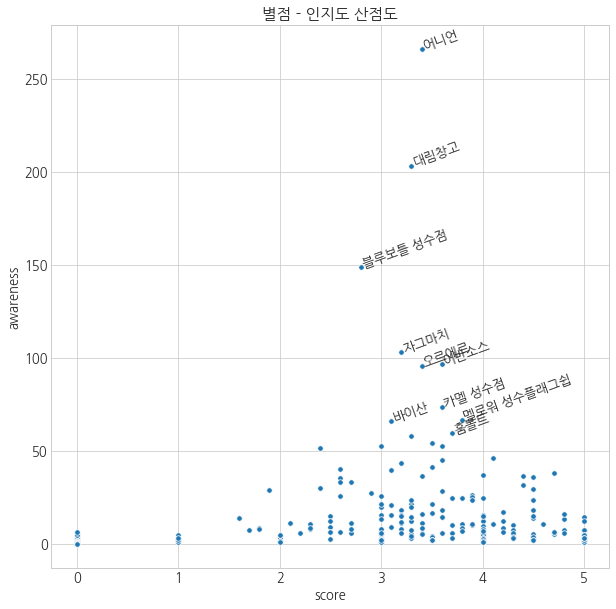

In [323]:
plt.figure(figsize=(10, 10))
sns.scatterplot('score', 'awareness', s=30, data=df_raw)
plt.title('별점 - 인지도 산점도')
for row in df_raw.sort_values('awareness', ascending=False).head(10).index:
    plt.text(df_raw.loc[row, 'score'],
             df_raw.loc[row, 'awareness'],
             df_raw.loc[row, 'name'],
             rotation=20)

* 인지도가 50 이상으로 **유명한 카페들은 대부분 3-4점**에 머무르고 있다.
* 그런데, 세 번째로 유명함에도 불구하고 **블루보틀은 2점대 후반**으로 10위권 중 가장 낮다.
    * 공간 활용, 맛 등 여러가지가 있겠지만, 자세하게 다루진 않겠다.
    * ~집에서 걸어서 1분 거리임에도, 한 번 가고나서는 안 가게 된다는...~

### 3-3. 은근히 넓은 성수동, 어디로 가야할까?
* 애인이 오늘 '성수동 놀러 가자' 라고 얘기했다고 가정해보자.
    * 없다고요? ~아 왜그래요 아 뭐요~
* 즐거운 데이트를 위해 카페를 찾아놨는데, 영업 휴일 혹은 만석 등의 이유로 찾아놓은 카페를 못가면 머리가 하얘질 것이다.
    * 이런 경우 정말 많다. 특히 요샌 사람이 굉장히 많아졌다.
    * 근데 이럴 때 그 근처 아무데나 갔다가 낭패를 볼 수도 있다.
* 어떻게 해야 **계획이 틀어져도 근처에 좋은 카페를 발견할 수 있는 확률을 높일 수 있을까?**
* 성수동의 카페를 지도에 시각화하여 알아보자.

#### 3-3-1. 카페의 지리 정보 찾기

In [326]:
import googlemaps
gmap_key = "***********"
gmaps = googlemaps.Client(key=gmap_key)

In [327]:
from tqdm import tqdm_notebook

# 혹시 모를 사태를 대비하여 원본을 복사하여 사용
df = df_raw.copy()

# 구글맵API를 활용하여 각 카페의 주소에 해당하는 지리 정보를 얻어오기
for row in tqdm_notebook(df.index):
    try:
        geo = gmaps.geocode(str(df.loc[row, 'address']))
        df.loc[row, 'lat'] = geo[0].get('geometry')['location']['lat']
        df.loc[row, 'lng'] = geo[0].get('geometry')['location']['lng']
    except:
        df.loc[row, 'lat'] = np.nan
        df.loc[row, 'lng'] = np.nan
df.head()

,name,address,score,score_cnt,review_cnt,awareness,lat,lng
0,블루보틀 성수점,성수동1가 656-302,2.8,85,635,148.5,37.548074,127.045617
1,할아버지공장,성수동2가 309-133,3.0,27,257,52.7,37.541084,127.054905
2,차,성수동1가 685-408,2.6,28,120,40.0,37.547794,127.041883
3,어니언,성수동2가 277-135,3.4,140,1257,265.7,37.544644,127.058323
4,대림창고,성수동2가 322-32,3.3,143,601,203.1,37.541797,127.056481


* 지리 정보(lat, lng)를 잘 얻어왔다.
* 혹시 null값이 있는지 찾아보자.

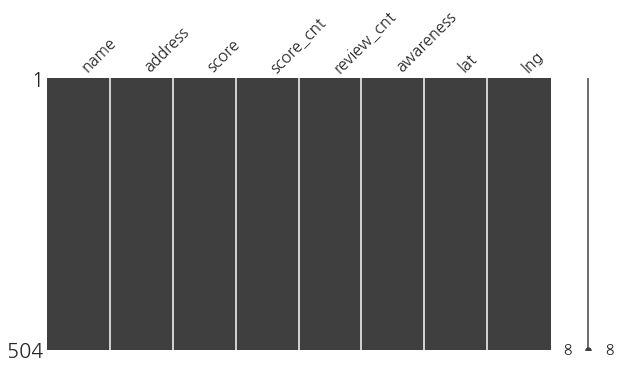

In [330]:
import missingno as msno
msno.matrix(df, figsize=(10, 5))
plt.show()

In [332]:
df.isnull().sum()

name          0
address       0
score         0
score_cnt     0
review_cnt    0
awareness     0
lat           0
lng           0
dtype: int64

* null값이 없다! 다행!
* 혹시 모르니 데이터를 저장해두자.

In [333]:
df.to_csv('source/cafe_in_seongsu_map.csv')

#### 3-3-2. 어디가 카페가 많을까?
* 일단 카페가 많으면 선택지가 많아진다.
* 어느 지역에 카페가 많은지 살펴보자.

In [400]:
map = folium.Map([df.lat.median(), df.lng.median()], zoom_start=15)
for row in df.index:
    lat = df.lat[row]
    lng = df.lng[row]
    folium.Marker([lat, lng]).add_to(map)
map

* 일단, 카페가 많은건 알겠다. 정말 많다.
* 근데, 어디가 밀집되어있는지 한 눈에 파악하기는 힘들다.
* 더 직관적으로 파악할 수 있도록 시각화해보자.

In [399]:
map = folium.Map([37.5438344, 127.05451205], zoom_start=15,
                 tiles='Stamen WaterColor')

# 지하철 표시
folium.Marker([37.543512, 127.044663], popup='서울숲역').add_to(map)
folium.Marker([37.547169, 127.047424], popup='뚝섬역').add_to(map)
folium.Marker([37.544474, 127.056012], popup='성수역').add_to(map)
folium.Marker([37.540333, 127.069316], popup='건대입구역').add_to(map)

# 카페 표시
for row in df.index:
    lat = df.lat[row]
    lng = df.lng[row]
    folium.CircleMarker([lat, lng], color='', fill=True, fill_color='#044275', radius=15).add_to(map)

# 카페 밀집 지역 표시
folium.CircleMarker([37.547072, 127.041576], color='#F247F5', radius=50).add_to(map)
folium.CircleMarker([37.542219, 127.055480], color='#F247F5', radius=50).add_to(map)
folium.CircleMarker([37.540277, 127.067754], color='#F247F5', radius=50).add_to(map)

map

* 지도 스타일을 조금 바꿔봤다.
    * 카페라는 보물을 찾아주는 보물 지도 느낌..?
* **서울숲 위쪽 부근**에(왼쪽 핑크 동그라미) 카페가 밀집되어 있는 것을 볼 수 있다.
    * 저 지역을 가보면 알겠지만, 사람보다 카페가 더 많다.
    * 일단 서울숲에 갈 계획이 있다면, 저쪽 부근을 중심으로 데이터 코스를 짜는 것이 바람직해보인다.
* 두 번째로는, **성수역(가운데 핑크 동그라미) 근처**에 카페가 모여있다.
    * 이 곳을 대표하는 카페는 대림창고가 있다.
    * 유명한 곳을 꼭 가봐야겠어! 라는 생각이 있다면 이 곳을 추천한다.
* 세 번째는, **건대입구역 근처**다.
    * 사실 건대입구를 성수동이라고 칭하지는 않는다.
    * 실제로 카페 분위기도 굉장히 다르지만, 번외편으로 추가해보았다.

#### 3-3-3. 어디를 가야 평점이 높은 카페가 많을까?
* 사실, 위 지도에서 보았듯 성수동에는 어딜 가나 카페가 많다.
    * 우리가 정말 궁금한 것은 어디를 가야 평점이 높은 카페가 많냐는 것이다!
* **평점이 높은 카페는 주로 어느 지역에 있는지** 알아보자.

In [445]:
map = folium.Map([37.544964, 127.049826], zoom_start=16,
                 tiles='stamen Toner')
for row in df.index:
    lat = df.lat[row]
    lng = df.lng[row]
    folium.CircleMarker([lat, lng], radius=np.log(df.loc[row, 'awareness'])*10, color='', fill=True, fill_opacity=.6,
                        fill_color='#F8F8C7' if df.score[row] < 1 else
                        ('#DFF7BE' if df.score[row] < 2 else 
                        ('#00AD2E' if df.score[row] < 3 else 
                        ('#00611A' if df.score[row] < 4 else '#007508')))).add_to(map)

# 지하철 표시
folium.Marker([37.543512, 127.044663], popup='서울숲역').add_to(map)
folium.Marker([37.547169, 127.047424], popup='뚝섬역').add_to(map)
folium.Marker([37.544474, 127.056012], popup='성수역').add_to(map)
folium.Marker([37.540333, 127.069316], popup='건대입구역').add_to(map)

map

* 건대부근을 제외하고 보다 성수동에 집중할 수 있도록 지도를 확대했다.
* 색이 진할수록 평점이 높고, 인지도가 높을수록 원이 크다.
* **1) 좀 더 유명하고 검증된 카페를 가고 싶다면,**
    * 오른쪽 중간, 성수역 근처 대림창고 부근을 가는 것이 좋아보인다.
    * 상대적으로 인지도가 높은(원이 큰) 카페가 많이 보이고, 평점도 높다
* **2) 인지도보다는 남들이 잘 모르는 카페를 찾아보고 싶다면,**
    * 서울숲 위쪽 거리가 좋은 선택이 될 것으로 보인다.
    * 전반적으로 인지도가 있는 카페는 1번의 선택보다는 적어보이지만, 카페가 더 밀집되어있다.
    * 그리고 중간정도의 인지도를 가진, 평점이 좋은 카페들이 모여있는것을 볼 수있다.

----
----
## 4. 결론
* 사실 이 분석은 육하나이라는 카페에서, *'성수동에 카페가 왜 이렇게 많아!'* 라는 생각에서 시작됐다.
* 단순한 질문에서 시작했지만,
    1. 어떤 카페가 가장 평점이 좋은지,
    2. 어떤 카페가 가장 유명한지,
    3. 성수동의 어느 지역을 가야 실패없이 많은 카페를 구경하고 경험할 수 있는지 알 수 있었다.
* 비록 부족한 분석력이었지만, 누군가에게는 흥미로운 스토리로 다가갔으면 좋겠다.